<center style=" color : yellow"> <h3><u>Projet Annuel Data Science : Régréssion logistique</u></h3> </center>
<center> <h4>Reconnaissances des mesagges a caracteres haineux et non haineux <h4></center>

<center>Importation des bibiotheques necessaires</center>

In [14]:
import nltk
import string
import joblib
import numpy as np
import pandas as pd
import seaborn as sns 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

<center>Importation des données</center>

In [15]:
dataMessages = pd.read_excel('Dataset1.xlsx')
dataMessages.head(5)
dataMessages['Decision']  = dataMessages['Decision'].dropna()

<center>Visualisation des données</center>

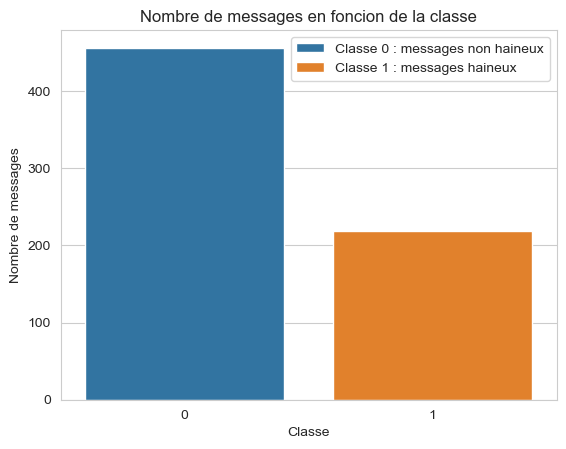

In [16]:
labels = ['Classe 0 : messages non haineux', 'Classe 1 : messages haineux']

sns.countplot(x='Decision', data=dataMessages, hue='Decision', legend=False)

sns.set_style('whitegrid')
plt.xlabel('Classe')
plt.ylabel('Nombre de messages')
plt.title('Nombre de messages en foncion de la classe')
plt.legend(labels)

plt.show()

<center>netoyage des données</center>

In [17]:
def cleanData(sentences):
    sentences = sentences.lower()
    sentences = sentences.translate(str.maketrans('','',string.punctuation)) # Suppression des caracteres spéciaux et la ponctuation
   
    words = set(stopwords.words('french')) # creation d'un ensemble de stop word de la langue francaise telles que (et, la , et etc...)
    
    sentences = ' '.join(word for word in sentences.split() if word not in words)

    return sentences

dataMessages['Message'] = dataMessages['Message'].apply(cleanData)

<center>Fonction qui converti une liste de message en dataframe</center>

In [18]:
def convertToDataFrame (messageList):

    if isinstance(messageList, list):
        messageList = pd.DataFrame(messageList, columns=['Message'])

    elif isinstance(messageList, str):
        messageList = [{'Message' : messageList}]
        messageList = pd.DataFrame(messageList)

    else:
        pass

    return messageList

<center><u>Vectorisation & Séparation du jeu de données</u></center>

<center>1 - Transformation des données textuelles en données numeriques(vectorisation des phrases) </center>

In [19]:
def vectorise (dataFrame, colName, vectorizer=None):
    messages = dataFrame[colName]

    """
        methode Bag-of-Words:
            methode utilisée pour representer les donneés textuelles sous
            forme numériques.
        Idée : 
            compter la fréquence d'apparition des mots et leur presence
            dans chaque phrase sans tenir compte de leur ordre.
    """
    if vectorizer is None:
        vectorizer = CountVectorizer()
        messagesVectorised = vectorizer.fit_transform(messages)
    else:
        messagesVectorised = vectorizer.transform(messages)

    """
    On pouvait proceder en deux etape :
    vectorizer.fit(messages) #Apprentissage du vocabulaire a partir des phrases contenues dans 'Messages'.
    messagesVectorised = vectorizer.transform(messages) #Transforme chaque phrase en vecteur numerique en comptant le nombre de mot du vocabulaire appris avec la methode vectorizer.fit()
    """ 
    return messagesVectorised, vectorizer


messagesVectorised, vectorizer = vectorise(dataMessages, 'Message')

<center>2 - Sépartion des données</center>

In [20]:

decision = dataMessages['Decision']

X_train, X_test, y_train, y_test = train_test_split(messagesVectorised, decision, test_size=0.25, random_state=5)

"""
    Sépartion des données d'entrainement et de test
    75% ==> données d"entrainement
    25% ==> données de test
"""

'\n    Sépartion des données d\'entrainement et de test\n    75% ==> données d"entrainement\n    25% ==> données de test\n'

<center>Developpement du modele de regrtession logistique</center>

In [21]:
model = LogisticRegression(class_weight='balanced', tol=1e-8)
#penalty=None, dual=False, tol=1e-5, 

model.fit(X_train, y_train)

performance = model.score(X_train, y_train) #performances
print(performance)

0.9920792079207921


<center>predictions</center>

In [22]:
y_predict =  model.predict(X_test)
y_predict_proba = model.predict_proba(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       113
           1       0.68      0.61      0.64        56

    accuracy                           0.78       169
   macro avg       0.75      0.73      0.74       169
weighted avg       0.77      0.78      0.77       169



<center>Métrics</center>

<Figure size 1000x600 with 0 Axes>

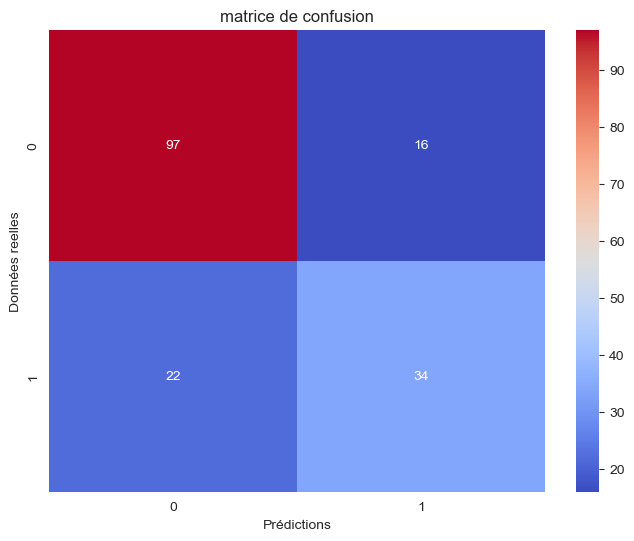

accuracy = 0.7751479289940828


In [23]:
accuracy = accuracy_score(y_test, y_predict)

confusionMatrix = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(10, 6))

plt.figure(figsize=(8, 6))

sns.heatmap(confusionMatrix, annot=True, cmap='coolwarm')
plt.xlabel('Prédictions')
plt.ylabel('Données reelles')
plt.title('matrice de confusion')

plt.show()

print(f"accuracy = {accuracy}")

In [24]:
joblib.dump(model, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

<center>Fonction qui va permettre de donnée la classe naturelle d'une phrase</center>

In [25]:
def classifyData (data):
    result = []
    data = cleanData(data)
    data = convertToDataFrame(data)
    data, _= vectorise(data, 'Message', vectorizer)
    prediction = model.predict(data)
    return prediction

In [26]:
data = "vous parlez de ce beau officier de police ?"
decision = classifyData(data)
if decision ==1 :
    print('message  haineux')
else:
    print('message non haineux')

message non haineux
